In [1]:
#Importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import pandas_gbq
from google.cloud import bigquery
import glob
import openpyxl
import csv

In [2]:
#Chamando diretório
os.chdir('G:\\Drives compartilhados\\República.org\\4. Equipes\\Dados e Comunicação\\DADOS\\415 - Repositório de Dados\\Dados para subir\\Dados Brutos\\INEP\\Esforço docente')

In [4]:
df1 = pd.read_csv('IED_ESCOLAS_2013.csv', sep=';', encoding='UTF8')
df1

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
1,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
3,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024372,EMEIEF ANA NERY,Rural,Municipal,20,...,0,71.4,0,0,--,--,--,--,--,--
4,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024402,EMMEF ANTONIO FRANCISCO LISBOA,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149136,2013,Centro_Oeste,DF,5300108,BRASILIA,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,25,...,--,--,--,--,--,--,--,--,--,--
149137,2013,Centro_Oeste,DF,5300108,BRASILIA,53084039,COL ANCHIETA,Urbana,Privada,15.3,...,12.5,37.5,0,0,--,--,--,--,--,--
149138,2013,Centro_Oeste,DF,5300108,BRASILIA,53084055,COL MAPA,Urbana,Privada,12.4,...,44.4,33.3,22.2,0,--,--,--,--,--,--
149139,2013,Centro_Oeste,DF,5300108,BRASILIA,53084071,ESC DIVINO MESTRE,Urbana,Privada,0,...,--,--,--,--,--,--,--,--,--,--


In [3]:
df2 = pd.read_csv('IED_ESCOLAS_2014.csv', sep=';', encoding='UTF8')
df2

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2014,Norte,RO,1100015,ALTA FLORESTA D OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
1,2014,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2014,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024372,EMEIEF ANA NERY,Rural,Municipal,50,...,0,60,0,0,--,--,--,--,--,--
3,2014,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024593,EMEIEF DARCY PENTEADO,Rural,Municipal,25.1,...,63.6,9.1,0,0,--,--,--,--,--,--
4,2014,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,35.2,...,9.1,45.5,9.1,18.2,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145805,2014,Centro_Oeste,DF,5300108,BRASILIA,53084063,CE UNIVERSO DA CRIANCA,Urbana,Privada,50,...,--,--,--,--,--,--,--,--,--,--
145806,2014,Centro_Oeste,DF,5300108,BRASILIA,53084071,ESC DIVINO MESTRE,Urbana,Privada,0,...,--,--,--,--,--,--,--,--,--,--
145807,2014,Centro_Oeste,DF,5300108,BRASILIA,53085000,COBIAN - COL BIANGULO,Urbana,Privada,20,...,--,--,--,--,--,--,--,--,--,--
145808,2014,Centro_Oeste,DF,5300108,BRASILIA,53086007,INSTEI - CE VICENTE PIRES,Urbana,Privada,0,...,9.1,81.8,0,9.1,0,0,9.1,81.8,0,9.1


In [6]:
df3 = pd.read_csv('IED_ESCOLAS_2015.csv', sep=';', encoding='UTF8')
df3

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2015,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,16,...,20,50,20,0,--,--,--,--,--,--
1,2015,Norte,RO,1100015,ALTA FLORESTA D OESTE,11025620,EEEF TANCREDO DE ALMEIDA NEVES,Urbana,Estadual,36.9,...,33.3,50,16.7,0,--,--,--,--,--,--
2,2015,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Urbana,Estadual,14.3,...,0,58.8,35.3,0,0,0,0,52.9,47.1,0
3,2015,Norte,RO,1100015,ALTA FLORESTA D OESTE,11025638,EEEFM PADRE EZEQUIEL RAMIN,Urbana,Estadual,14.9,...,19.1,47.6,23.8,9.5,0,2,22,40,26,10
4,2015,Norte,RO,1100015,ALTA FLORESTA D OESTE,11046244,EIEEF AMEN KOARE TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142690,2015,Centro-Oeste,DF,5300108,BRASILIA,53005511,MONT BLANC CED,Urbana,Privada,18.7,...,0,45.5,18.2,0,0,41.7,0,50,8.3,0
142691,2015,Centro-Oeste,DF,5300108,BRASILIA,53015150,RECANTO INF CALAZANS,Urbana,Privada,50,...,--,--,--,--,--,--,--,--,--,--
142692,2015,Centro-Oeste,DF,5300108,BRASILIA,53002164,SIGMA L2 NORTE,Urbana,Privada,40.1,...,28.6,47.6,23.8,0,--,--,--,--,--,--
142693,2015,Centro-Oeste,DF,5300108,BRASILIA,53014782,ESC LAZARO LUIZ ZAMENHOF-CURUMIM,Rural,Privada,50,...,--,--,--,--,--,--,--,--,--,--


In [7]:
df4 = pd.read_csv('IED_ESCOLAS_2016.csv', sep=';', encoding='UTF8')
df4

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2016,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
1,2016,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2016,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,50,...,0,20,20,0,--,--,--,--,--,--
3,2016,Norte,RO,1100015,Alta Floresta D'Oeste,11024593,EMEIEF DARCY PENTEADO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
4,2016,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,22.8,...,0,53.3,6.7,20,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141589,2016,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,6.2,...,22.2,33.3,11.1,0,--,--,--,--,--,--
141590,2016,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,10.5,...,23.1,61.5,7.7,0,0,14.4,21.4,57.1,7.1,0
141591,2016,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,0,...,--,--,--,--,--,--,--,--,--,--
141592,2016,Centro-Oeste,DF,5300108,Brasília,53086007,CED VITORIA REGIA,Urbana,Privada,0,...,70,20,0,10,0,0,70,20,0,10


In [8]:
df5 = pd.read_csv('IED_ESCOLAS_2017.csv', sep=';', encoding='UTF8')
df5

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2017,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
1,2017,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2017,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,50,...,40,20,20,0,--,--,--,--,--,--
3,2017,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,31.2,...,0,90,0,10,--,--,--,--,--,--
4,2017,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,11.2,...,41.7,25,25,0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139090,2017,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,10,...,36.4,18.2,9.1,0,--,--,--,--,--,--
139091,2017,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,5,...,30.8,69.2,0,0,0,0,30.8,69.2,0,0
139092,2017,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,9,...,--,--,--,--,--,--,--,--,--,--
139093,2017,Centro-Oeste,DF,5300108,Brasília,53086007,CED VITORIA REGIA,Urbana,Privada,0,...,30,50,20,0,0,7.6,30.8,46.2,15.4,0


In [9]:
df6 = pd.read_csv('IED_ESCOLAS_2018.csv', sep=';', encoding='UTF8')
df6

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2018,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,0,0,0,0,--,--,--,--,--,--
1,2018,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2018,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,50,...,60,20,0,0,--,--,--,--,--,--
3,2018,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,33.2,...,33.4,44.4,11.1,11.1,--,--,--,--,--,--
4,2018,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,30.8,...,45.4,27.3,18.2,9.1,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136172,2018,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,9.7,...,52.9,5.9,5.9,0,0,16.7,66.7,8.3,8.3,0
136173,2018,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,5.3,...,38.4,38.5,7.7,15.4,0,0,23,46.2,7.7,23.1
136174,2018,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,11.1,...,--,--,--,--,--,--,--,--,--,--
136175,2018,Centro-Oeste,DF,5300108,Brasília,53086007,CED VITORIA REGIA,Urbana,Privada,0,...,18.2,54.5,27.3,0,0,30.7,7.7,38.5,23.1,0


In [10]:
df7 = pd.read_csv('IED_ESCOLAS_2019.csv', sep=';', encoding='UTF8')
df7

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1\n,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2019,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,33.3,...,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,30.7,...,37.5,37.5,0.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,24.0,...,42.9,35.7,14.3,7.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134147,2019,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134148,2019,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,10.3,...,29.2,41.7,12.5,4.2,0.0,0.0,46.1,30.8,15.4,7.7
134149,2019,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,11.1,...,33.3,41.7,16.7,8.3,0.0,15.3,15.4,46.2,15.4,7.7
134150,2019,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df8 = pd.read_csv('IED_ESCOLAS_2020.csv', sep=';', encoding='UTF8')
df8

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,--,--,--,--,--,--,--
1,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,37.5,...,60,20,0,0,--,--,--,--,--,--
3,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,33.4,...,33.3,44.4,11.1,0,--,--,--,--,--,--
4,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,15,...,43.7,12.5,37.5,6.3,0,0,0,5.2,76.9,17.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132897,2020,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,20,...,--,--,--,--,--,--,--,--,--,--
132898,2020,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,4.6,...,57.2,21.4,14.3,7.1,--,--,--,--,--,--
132899,2020,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,18.7,...,41.7,33.3,0,0,0,0,46.1,30.8,15.4,7.7
132900,2020,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,0,...,--,--,--,--,--,--,--,--,--,--


In [12]:
df9 = pd.read_csv('IED_ESCOLAS_2021.csv', sep=';', encoding='UTF8')
df9

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2021,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,--,--,--,--,--,--,--
1,2021,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2021,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,33.3,...,71.4,14.3,0,0,--,--,--,--,--,--
3,2021,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,28.6,...,18.2,45.5,27.3,0,--,--,--,--,--,--
4,2021,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,Urbana,Estadual,6.1,...,50,14.3,28.6,7.1,0,0,0,62.5,25,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131799,2021,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,40,...,--,--,--,--,--,--,--,--,--,--
131800,2021,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,4,...,31.3,62.5,0,0,--,--,--,--,--,--
131801,2021,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,26.6,...,40,40,10,0,0,0,38.4,38.5,15.4,7.7
131802,2021,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,21.5,...,--,--,--,--,--,--,--,--,--,--


In [13]:
df10 = pd.read_csv('IED_ESCOLAS_2022.csv', sep=';', encoding='UTF8')
df10

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EF_finais_grupo3,EF_finais_grupo4,EF_finais_grupo5,EF_finais_grupo6,EM_grupo1,EM_grupo2,EM_grupo3,EM_grupo4,EM_grupo5,EM_grupo6
0,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,--,--,--,--,--,--,--
1,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100,...,0,0,0,0,--,--,--,--,--,--
2,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,42.9,...,66.7,0,0,0,--,--,--,--,--,--
3,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,21,...,25,43.8,18.8,6.3,--,--,--,--,--,--
4,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,Urbana,Estadual,21,...,40,26.7,20,13.3,0,2.5,0,67.5,22.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130902,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,20,...,--,--,--,--,--,--,--,--,--,--
130903,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,9.1,...,28.6,35.7,14.3,0,--,--,--,--,--,--
130904,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,29.4,...,54.5,36.4,0,0,0,7.6,38.5,30.8,15.4,7.7
130905,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,7.6,...,--,--,--,--,--,--,--,--,--,--


In [14]:
tabela_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
tabela_final

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EM_grupo4,EM_grupo5,EM_grupo6,EF_total_grupo4.1,EF_total_grupo1\n,EF_total_grupo2\n,EF_iniciais_grupo1\n,EF_iniciais_grupo2\n,EF_finais_grupo1\n,EF_finais_grupo2\n
0,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024372,EMEIEF ANA NERY,Rural,Municipal,20,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024402,EMMEF ANTONIO FRANCISCO LISBOA,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130902,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,20,...,--,--,--,NaN,NaN,NaN,NaN,NaN,--,--
130903,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,9.1,...,--,--,--,NaN,NaN,NaN,NaN,NaN,14.3,7.1
130904,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,29.4,...,30.8,15.4,7.7,NaN,NaN,NaN,NaN,NaN,0,9.1
130905,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,7.6,...,--,--,--,NaN,NaN,NaN,NaN,NaN,--,--


In [18]:
tabela_final.to_csv('Tabela final de Esforço Docente.csv',index = False)


In [4]:
df = pd.read_csv("Tabela final de Esforço Docente.csv")
df

C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1983519803.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Tabela final de Esforço Docente.csv")


,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,EF_total_grupo1,...,EM_grupo4,EM_grupo5,EM_grupo6,EF_total_grupo4.1,EF_total_grupo1\n,EF_total_grupo2\n,EF_iniciais_grupo1\n,EF_iniciais_grupo2\n,EF_finais_grupo1\n,EF_finais_grupo2\n
0,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024372,EMEIEF ANA NERY,Rural,Municipal,20,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,11024402,EMMEF ANTONIO FRANCISCO LISBOA,Rural,Municipal,100,...,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384272,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,20,...,--,--,--,NaN,NaN,NaN,NaN,NaN,--,--
1384273,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,9.1,...,--,--,--,NaN,NaN,NaN,NaN,NaN,14.3,7.1
1384274,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,29.4,...,30.8,15.4,7.7,NaN,NaN,NaN,NaN,NaN,0,9.1
1384275,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,7.6,...,--,--,--,NaN,NaN,NaN,NaN,NaN,--,--


Análise por grupo


GRUPO 1 - Docente que, em geral, tem até 25 alunos e atua em um único turno, escola e etapa.


In [5]:
grupo1 = df[['Ano','Dependência Administrativa','EF_total_grupo1', 'EF_finais_grupo1','EM_grupo1',]]
grupo1 

,Ano,Dependência Administrativa,EF_total_grupo1,EF_finais_grupo1,EM_grupo1
0,2013,Estadual,100,100,--
1,2013,Municipal,100,100,--
2,2013,Municipal,100,100,--
3,2013,Municipal,20,0,--
4,2013,Municipal,100,100,--
...,...,...,...,...,...
1384272,2022,Privada,20,NaN,--
1384273,2022,Privada,9.1,NaN,--
1384274,2022,Privada,29.4,NaN,0
1384275,2022,Privada,7.6,NaN,--


In [6]:
grupo1['EM_grupo1'] = np.where(grupo1['EM_grupo1']=="--", np.nan, grupo1['EM_grupo1'])
grupo1['EF_finais_grupo1'] = np.where(grupo1['EF_finais_grupo1']=="--", np.nan, grupo1['EF_finais_grupo1'])
grupo1['EF_total_grupo1'] = np.where(grupo1['EF_total_grupo1']=="--",np.nan, grupo1['EF_total_grupo1'])
grupo1


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\2351295104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo1['EM_grupo1'] = np.where(grupo1['EM_grupo1']=="--", np.nan, grupo1['EM_grupo1'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\2351295104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo1['EF_finais_grupo1'] = np.where(grupo1['EF_finais_grupo1']=="--", np.nan, grupo1['EF_finais_grupo1'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\23

,Ano,Dependência Administrativa,EF_total_grupo1,EF_finais_grupo1,EM_grupo1
0,2013,Estadual,100,100,NaN
1,2013,Municipal,100,100,NaN
2,2013,Municipal,100,100,NaN
3,2013,Municipal,20,0,NaN
4,2013,Municipal,100,100,NaN
...,...,...,...,...,...
1384272,2022,Privada,20,NaN,NaN
1384273,2022,Privada,9.1,NaN,NaN
1384274,2022,Privada,29.4,NaN,0
1384275,2022,Privada,7.6,NaN,NaN


In [7]:
#para fazer a média, é necessário que os valores estejam em float
grupo1['EM_grupo1'] = pd.to_numeric(grupo1['EM_grupo1'])
grupo1['EF_total_grupo1'] = pd.to_numeric(grupo1['EF_total_grupo1'])
grupo1['EF_finais_grupo1'] = pd.to_numeric(grupo1['EF_finais_grupo1']) 
grupo1


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\476629516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo1['EM_grupo1'] = pd.to_numeric(grupo1['EM_grupo1'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\476629516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo1['EF_total_grupo1'] = pd.to_numeric(grupo1['EF_total_grupo1'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\476629516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

,Ano,Dependência Administrativa,EF_total_grupo1,EF_finais_grupo1,EM_grupo1
0,2013,Estadual,100.0,100.0,NaN
1,2013,Municipal,100.0,100.0,NaN
2,2013,Municipal,100.0,100.0,NaN
3,2013,Municipal,20.0,0.0,NaN
4,2013,Municipal,100.0,100.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,20.0,NaN,NaN
1384273,2022,Privada,9.1,NaN,NaN
1384274,2022,Privada,29.4,NaN,0.0
1384275,2022,Privada,7.6,NaN,NaN


In [8]:
grupo1.dtypes

Ano                             int64
Dependência Administrativa     object
EF_total_grupo1               float64
EF_finais_grupo1              float64
EM_grupo1                     float64
dtype: object

In [9]:
#Fazer a média de público e privado para grupo 4 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo1 = pd.pivot_table(grupo1, values='EF_total_grupo1', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo1 = pd.pivot_table(grupo1, values='EF_finais_grupo1', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 do EM por ano, de 2013 até 2022
media_em_grupo1 = pd.pivot_table(grupo1, values='EM_grupo1', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 1 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo1


Média do grupo 1 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,14.311494,13.793617,40.674084,26.096578
2014,14.143197,13.565957,39.828249,26.311086
2015,13.938836,13.350000,39.441763,26.772656
2016,13.832109,13.359574,39.058875,26.998964
2017,13.411208,13.600000,38.242747,27.159328
2018,12.942746,14.976596,37.333892,27.424558
2020,11.616569,12.858696,37.278414,27.749464
2021,10.842983,16.563830,35.144351,28.892110
2022,11.080235,16.129787,36.130770,27.260305


In [10]:
print('Média do grupo 1 do EF (6º ao 9º) total dos 10 ultimos anos de ambas as redes ')
media_ef_finais_grupo1 

Média do grupo 1 do EF (6º ao 9º) total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,7.156643,0.269231,32.766335,6.153971
2014,7.233764,1.174359,31.306011,6.365589
2015,6.863369,1.918421,30.640801,6.447447
2016,6.941190,2.484615,29.836453,6.344362
2017,6.696956,2.410256,28.808510,6.407082
2018,6.652879,1.871795,28.300221,6.346192
2019,6.342257,1.369231,27.494508,6.431005
2020,5.559573,1.233333,27.576153,6.418982
2021,5.141413,2.725641,25.384830,6.453480


In [11]:
print('Média do grupo 1 do EM total dos 10 ultimos anos de ambas as redes ')
media_em_grupo1

Média do grupo 1 do EM total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,0.979305,2.262500,1.832948,1.083989
2014,1.039880,2.578186,1.608497,1.066084
2015,1.102386,2.752542,2.438989,1.164970
2016,1.218525,2.781081,2.389844,1.168933
2017,1.075310,3.077899,2.054286,1.172476
2018,1.163373,2.196880,0.541885,1.215025
2019,1.127950,1.654949,1.741489,1.267912
2020,1.095720,1.546912,1.067760,1.294166
2021,1.130710,1.921513,0.410638,1.359206



GRUPO 2

In [12]:
grupo2 = df[['Ano','Dependência Administrativa','EF_total_grupo2', 'EF_finais_grupo2','EM_grupo2',]] 
grupo2

,Ano,Dependência Administrativa,EF_total_grupo2,EF_finais_grupo2,EM_grupo2
0,2013,Estadual,0,0,--
1,2013,Municipal,0,0,--
2,2013,Municipal,0,0,--
3,2013,Municipal,20,28.6,--
4,2013,Municipal,0,0,--
...,...,...,...,...,...
1384272,2022,Privada,0,NaN,--
1384273,2022,Privada,9.1,NaN,--
1384274,2022,Privada,11.8,NaN,7.6
1384275,2022,Privada,7.7,NaN,--


In [13]:
grupo2['EM_grupo2'] = np.where(grupo2['EM_grupo2']=="--", np.nan, grupo2['EM_grupo2'])
grupo2['EF_finais_grupo2'] = np.where(grupo2['EF_finais_grupo2']=="--", np.nan, grupo2['EF_finais_grupo2'])
grupo2['EF_total_grupo2'] = np.where(grupo2['EF_total_grupo2']=="--",np.nan, grupo2['EF_total_grupo2'])
grupo2

C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3404851896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo2['EM_grupo2'] = np.where(grupo2['EM_grupo2']=="--", np.nan, grupo2['EM_grupo2'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3404851896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo2['EF_finais_grupo2'] = np.where(grupo2['EF_finais_grupo2']=="--", np.nan, grupo2['EF_finais_grupo2'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\34

,Ano,Dependência Administrativa,EF_total_grupo2,EF_finais_grupo2,EM_grupo2
0,2013,Estadual,0,0,NaN
1,2013,Municipal,0,0,NaN
2,2013,Municipal,0,0,NaN
3,2013,Municipal,20,28.6,NaN
4,2013,Municipal,0,0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0,NaN,NaN
1384273,2022,Privada,9.1,NaN,NaN
1384274,2022,Privada,11.8,NaN,7.6
1384275,2022,Privada,7.7,NaN,NaN


In [14]:
grupo2['EM_grupo2'] = pd.to_numeric(grupo2['EM_grupo2'])
grupo2['EF_total_grupo2'] = pd.to_numeric(grupo2['EF_total_grupo2'])
grupo2['EF_finais_grupo2'] = pd.to_numeric(grupo2['EF_finais_grupo2']) 
grupo2


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1705207228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo2['EM_grupo2'] = pd.to_numeric(grupo2['EM_grupo2'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1705207228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo2['EF_total_grupo2'] = pd.to_numeric(grupo2['EF_total_grupo2'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1705207228.py:3: SettingWithCopyWarning: 
A value is trying to be set o

,Ano,Dependência Administrativa,EF_total_grupo2,EF_finais_grupo2,EM_grupo2
0,2013,Estadual,0.0,0.0,NaN
1,2013,Municipal,0.0,0.0,NaN
2,2013,Municipal,0.0,0.0,NaN
3,2013,Municipal,20.0,28.6,NaN
4,2013,Municipal,0.0,0.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0.0,NaN,NaN
1384273,2022,Privada,9.1,NaN,NaN
1384274,2022,Privada,11.8,NaN,7.6
1384275,2022,Privada,7.7,NaN,NaN


In [15]:
grupo2.dtypes

Ano                             int64
Dependência Administrativa     object
EF_total_grupo2               float64
EF_finais_grupo2              float64
EM_grupo2                     float64
dtype: object

In [16]:
#Usando pivot table, irei:
#Fazer a média de público e privado para grupo 4 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo2 = pd.pivot_table(grupo2, values='EF_total_grupo2', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo2 = pd.pivot_table(grupo2, values='EF_finais_grupo2', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 do EM por ano, de 2013 até 2022
media_em_grupo2 = pd.pivot_table(grupo2, values='EM_grupo2', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 2 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo2


Média do grupo 2 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,11.572083,33.551064,12.104568,11.256784
2014,11.808239,34.527660,12.571082,11.408509
2015,11.694526,38.143478,12.836235,11.891432
2016,11.278472,39.578723,12.743368,11.966687
2017,11.074839,39.059574,13.036134,12.086513
2018,11.003086,40.514894,13.105636,11.990680
2019,10.709927,39.217021,13.215198,11.959353
2021,10.312967,37.065957,13.373843,11.690901
2022,10.797538,37.048936,12.754231,11.306850


In [17]:
print('Média do grupo 2 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes ')
media_ef_finais_grupo2 #Docente que, em geral, tem entre 25 e 150 alunos e atua em um único turno, escola e etapa.   


Média do grupo 2 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,9.432100,38.938462,11.977104,13.531167
2014,9.668311,38.035897,12.631288,13.677782
2015,9.450953,41.802632,12.919300,14.413199
2016,8.807309,44.358974,13.002376,14.724433
2017,8.551867,42.853846,13.382978,15.278747
2018,8.401788,45.584615,13.304689,15.435838
2019,8.351643,43.846154,13.533605,15.284627
2020,7.837572,42.410256,13.705382,15.183179
2021,7.765549,42.800000,13.486204,15.206540


In [18]:
print('Média do grupo 2 do EM dos 10 ultimos anos de ambas as redes')
media_em_grupo2

Média do grupo 2 do EM dos 10 ultimos anos de ambas as redes


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,6.486444,24.372917,8.177457,8.174402
2014,6.880322,27.813725,9.375163,8.380174
2015,6.768908,31.317585,9.375812,8.827548
2016,6.396375,32.147876,10.113281,8.929845
2017,6.242381,31.617210,9.396327,8.993300
2018,6.510244,31.631196,10.044503,8.922356
2019,6.791107,31.384983,8.811170,8.850357
2020,6.767476,32.127212,9.440984,8.831424
2021,6.754974,33.733782,9.048936,8.517605


GRUPO 3

In [19]:
grupo3 = df[['Ano','Dependência Administrativa','EF_total_grupo3', 'EF_finais_grupo3','EM_grupo3',]] #total = anos finais e iniciais do ensino fundamental
grupo3

,Ano,Dependência Administrativa,EF_total_grupo3,EF_finais_grupo3,EM_grupo3
0,2013,Estadual,0,0,--
1,2013,Municipal,0,0,--
2,2013,Municipal,0,0,--
3,2013,Municipal,10,0,--
4,2013,Municipal,0,0,--
...,...,...,...,...,...
1384272,2022,Privada,80,--,--
1384273,2022,Privada,36.4,28.6,--
1384274,2022,Privada,35.3,54.5,38.5
1384275,2022,Privada,38.5,--,--


In [20]:
grupo3['EM_grupo3'] = np.where(grupo3['EM_grupo3']=="--", np.nan, grupo3['EM_grupo3'])
grupo3['EF_finais_grupo3'] = np.where(grupo3['EF_finais_grupo3']=="--", np.nan, grupo3['EF_finais_grupo3'])
grupo3['EF_total_grupo3'] = np.where(grupo3['EF_total_grupo3']=="--",np.nan, grupo3['EF_total_grupo3'])
grupo3


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3029949420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo3['EM_grupo3'] = np.where(grupo3['EM_grupo3']=="--", np.nan, grupo3['EM_grupo3'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3029949420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo3['EF_finais_grupo3'] = np.where(grupo3['EF_finais_grupo3']=="--", np.nan, grupo3['EF_finais_grupo3'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\30

,Ano,Dependência Administrativa,EF_total_grupo3,EF_finais_grupo3,EM_grupo3
0,2013,Estadual,0,0,NaN
1,2013,Municipal,0,0,NaN
2,2013,Municipal,0,0,NaN
3,2013,Municipal,10,0,NaN
4,2013,Municipal,0,0,NaN
...,...,...,...,...,...
1384272,2022,Privada,80,NaN,NaN
1384273,2022,Privada,36.4,28.6,NaN
1384274,2022,Privada,35.3,54.5,38.5
1384275,2022,Privada,38.5,NaN,NaN


In [21]:
grupo3['EM_grupo3'] = pd.to_numeric(grupo3['EM_grupo3'])
grupo3['EF_total_grupo3'] = pd.to_numeric(grupo3['EF_total_grupo3'])
grupo3['EF_finais_grupo3'] = pd.to_numeric(grupo3['EF_finais_grupo3']) 
grupo3


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1942463277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo3['EM_grupo3'] = pd.to_numeric(grupo3['EM_grupo3'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1942463277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo3['EF_total_grupo3'] = pd.to_numeric(grupo3['EF_total_grupo3'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1942463277.py:3: SettingWithCopyWarning: 
A value is trying to be set o

,Ano,Dependência Administrativa,EF_total_grupo3,EF_finais_grupo3,EM_grupo3
0,2013,Estadual,0.0,0.0,NaN
1,2013,Municipal,0.0,0.0,NaN
2,2013,Municipal,0.0,0.0,NaN
3,2013,Municipal,10.0,0.0,NaN
4,2013,Municipal,0.0,0.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,80.0,NaN,NaN
1384273,2022,Privada,36.4,28.6,NaN
1384274,2022,Privada,35.3,54.5,38.5
1384275,2022,Privada,38.5,NaN,NaN


In [22]:
grupo3.dtypes


Ano                             int64
Dependência Administrativa     object
EF_total_grupo3               float64
EF_finais_grupo3              float64
EM_grupo3                     float64
dtype: object

In [23]:
#Usando pivot table, irei:
#Fazer a média de público e privado para grupo 4 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo3 = pd.pivot_table(grupo3, values='EF_total_grupo3', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo3 = pd.pivot_table(grupo3, values='EF_finais_grupo3', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 do EM por ano, de 2013 até 2022
media_em_grupo3 = pd.pivot_table(grupo3, values='EM_grupo3', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 3 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo3



Média do grupo 3 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,18.347507,28.410638,22.078177,29.947663
2014,18.442211,29.538298,21.939506,30.137235
2015,17.895269,27.841304,21.806764,29.762945
2016,17.824970,26.453191,21.979838,30.017771
2017,17.751946,27.565957,22.109901,30.371631
2018,17.956833,25.861702,22.162200,30.519111
2019,18.517350,28.368085,22.286543,30.293167
2020,20.442472,29.789130,22.477465,30.573746
2021,20.773748,28.023404,23.002188,29.816485


In [24]:
print('Média do grupo 3 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes ')
media_ef_finais_grupo3

Média do grupo 3 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,18.093139,32.551282,21.140541,21.978917
2014,18.194224,33.548718,21.227636,22.339655
2015,17.708572,30.776316,20.962887,22.980888
2016,17.707637,27.692308,21.186628,23.467159
2017,17.653114,29.389744,21.192836,24.130469
2018,17.708021,28.738462,21.142530,24.408230
2019,18.265957,32.420513,21.294577,24.706125
2020,20.469892,32.720513,21.567982,25.462884
2021,21.002042,30.989744,21.821962,25.645675


In [26]:
print('Média do grupo 3 do EM dos 10 ultimos anos de ambas as redes ')
media_em_grupo3 #Docente que, em geral, tem entre 25 e 300 alunos e atua em um ou dois turnos em uma única escola e etapa.     

Média do grupo 3 do EM dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,18.977994,29.123698,19.734393,25.863041
2014,19.557863,29.307598,19.524510,26.368395
2015,19.143713,29.718220,19.742599,27.454974
2016,18.861961,30.106178,17.108203,28.243334
2017,19.268461,31.075906,19.418776,29.164651
2018,19.373627,32.154246,21.746073,29.609176
2019,19.666973,33.747440,21.925000,29.687774
2020,21.539497,34.640735,21.700546,30.501553
2021,22.115219,34.717143,22.485638,30.880152


Análises com o grupo 4 (Docente que, em geral, tem entre 50 e 400 alunos e atua em dois turnos, em uma ou duas escolas e em duas etapas.)


In [27]:
## Pegando uma parte do df para trabalhar apenas com o grupo 4 do Ensino Fundamental (Sigla EF) e Ensino Médio (Sigla EM). 
grupo4 = df[['Ano','Dependência Administrativa','EF_total_grupo4', 'EF_finais_grupo4','EM_grupo4',]] #total = anos finais e iniciais do ensino fundamental
grupo4

,Ano,Dependência Administrativa,EF_total_grupo4,EF_finais_grupo4,EM_grupo4
0,2013,Estadual,0,0,--
1,2013,Municipal,0,0,--
2,2013,Municipal,0,0,--
3,2013,Municipal,50,71.4,--
4,2013,Municipal,0,0,--
...,...,...,...,...,...
1384272,2022,Privada,0,--,--
1384273,2022,Privada,31.8,35.7,--
1384274,2022,Privada,23.5,36.4,30.8
1384275,2022,Privada,30.8,--,--


In [28]:
grupo4['EM_grupo4'] = np.where(grupo4['EM_grupo4']=="--", np.nan, grupo4['EM_grupo4'])
grupo4['EF_finais_grupo4'] = np.where(grupo4['EF_finais_grupo4']=="--", np.nan, grupo4['EF_finais_grupo4'])
grupo4['EF_total_grupo4'] = np.where(grupo4['EF_total_grupo4']=="--",np.nan, grupo4['EF_total_grupo4'])
grupo4

C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1654252462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo4['EM_grupo4'] = np.where(grupo4['EM_grupo4']=="--", np.nan, grupo4['EM_grupo4'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1654252462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo4['EF_finais_grupo4'] = np.where(grupo4['EF_finais_grupo4']=="--", np.nan, grupo4['EF_finais_grupo4'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\16

,Ano,Dependência Administrativa,EF_total_grupo4,EF_finais_grupo4,EM_grupo4
0,2013,Estadual,0,0,NaN
1,2013,Municipal,0,0,NaN
2,2013,Municipal,0,0,NaN
3,2013,Municipal,50,71.4,NaN
4,2013,Municipal,0,0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0,NaN,NaN
1384273,2022,Privada,31.8,35.7,NaN
1384274,2022,Privada,23.5,36.4,30.8
1384275,2022,Privada,30.8,NaN,NaN


In [29]:
grupo4.dtypes 

Ano                            int64
Dependência Administrativa    object
EF_total_grupo4               object
EF_finais_grupo4              object
EM_grupo4                     object
dtype: object

In [30]:
#para fazer a média, é necessário que os valores estejam em float
grupo4['EM_grupo4'] = pd.to_numeric(grupo4['EM_grupo4'])
grupo4['EF_total_grupo4'] = pd.to_numeric(grupo4['EF_total_grupo4'])
grupo4['EF_finais_grupo4'] = pd.to_numeric(grupo4['EF_finais_grupo4']) 
grupo4

C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\2732130206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo4['EM_grupo4'] = pd.to_numeric(grupo4['EM_grupo4'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\2732130206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo4['EF_total_grupo4'] = pd.to_numeric(grupo4['EF_total_grupo4'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\2732130206.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,Ano,Dependência Administrativa,EF_total_grupo4,EF_finais_grupo4,EM_grupo4
0,2013,Estadual,0.0,0.0,NaN
1,2013,Municipal,0.0,0.0,NaN
2,2013,Municipal,0.0,0.0,NaN
3,2013,Municipal,50.0,71.4,NaN
4,2013,Municipal,0.0,0.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0.0,NaN,NaN
1384273,2022,Privada,31.8,35.7,NaN
1384274,2022,Privada,23.5,36.4,30.8
1384275,2022,Privada,30.8,NaN,NaN


In [31]:
grupo4.dtypes

Ano                             int64
Dependência Administrativa     object
EF_total_grupo4               float64
EF_finais_grupo4              float64
EM_grupo4                     float64
dtype: object

In [32]:
#Usando pivot table, irei:
#Fazer a média de público e privado para grupo 4 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo4 = pd.pivot_table(grupo4, values='EF_total_grupo4', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo4 = pd.pivot_table(grupo4, values='EF_total_grupo4', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 4 do EM por ano, de 2013 até 2022
media_em_grupo4 = pd.pivot_table(grupo4, values='EM_grupo4', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 4 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo4 #Docente que, em geral, tem entre 50 e 400 alunos e atua em dois turnos, em uma ou duas escolas e em duas etapas.

Média do grupo 4 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,38.094868,19.074468,19.572080,23.151525
2014,38.391376,17.882979,19.993903,23.002326
2015,39.025878,16.686957,20.295330,23.002883
2016,39.105935,16.648936,20.587180,22.758205
2017,39.220358,16.440426,20.992366,22.619034
2018,39.301765,15.959574,21.738880,22.469489
2019,39.503874,15.442553,21.783876,22.852789
2020,40.222913,15.945652,21.390903,22.810795
2021,39.426358,15.774468,22.479104,22.553178


In [33]:
print('Média do grupo 4 dos anos finais do EF dos 10 ultimos anos de ambas as redes')
media_ef_finais_grupo4
#Vemos que no EF II 

Média do grupo 4 dos anos finais do EF dos 10 ultimos anos de ambas as redes


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,38.094868,19.074468,19.572080,23.151525
2014,38.391376,17.882979,19.993903,23.002326
2015,39.025878,16.686957,20.295330,23.002883
2016,39.105935,16.648936,20.587180,22.758205
2017,39.220358,16.440426,20.992366,22.619034
2018,39.301765,15.959574,21.738880,22.469489
2019,39.503874,15.442553,21.783876,22.852789
2020,40.222913,15.945652,21.390903,22.810795
2021,39.426358,15.774468,22.479104,22.553178


In [34]:
print('Média do grupo 4 do EM total dos 10 ultimos anos de ambas as redes ')
media_em_grupo4

Média do grupo 4 do EM total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,45.254554,38.297917,42.447688,39.393638
2014,45.063197,34.621569,41.440523,39.675550
2015,45.633588,32.111017,40.268592,39.624384
2016,45.422244,31.660618,42.687891,39.532870
2017,44.897029,31.473732,44.027755,39.526751
2018,44.436683,31.235529,43.484817,40.078355
2019,44.532285,30.598805,43.371277,40.443815
2020,44.638270,29.299332,44.028415,40.988699
2021,42.861269,27.337647,44.141489,40.837757


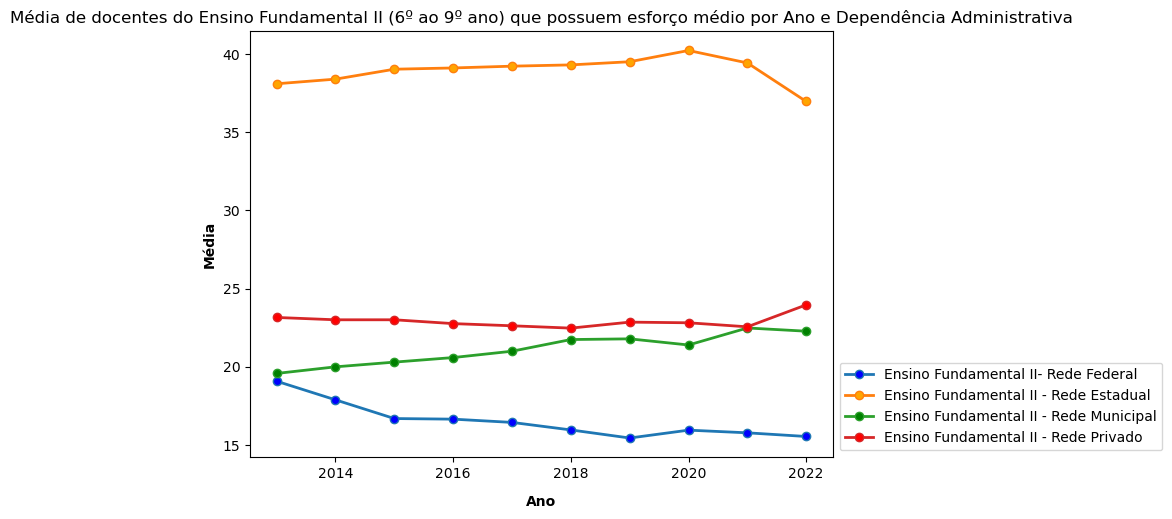

In [35]:
#Definindo as variáveis do gráfico
Anos = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

media_federal_finais_ef = media_ef_finais_grupo4['Federal']
media_estadual_finais_ef = media_ef_finais_grupo4['Estadual']
media_municipal_finais_ef = media_ef_finais_grupo4['Municipal']
media_privado_finais_ef = media_ef_finais_grupo4['Privada']

#Plotando as variáveis do anos finais do Ensino Fundamental
plt.plot(Anos, media_federal_finais_ef, label='Ensino Fundamental II- Rede Federal',linewidth=2, marker='o', markerfacecolor='blue')
plt.plot(Anos, media_estadual_finais_ef, label='Ensino Fundamental II - Rede Estadual', linewidth=2, marker='o', markerfacecolor='orange') 
plt.plot(Anos, media_municipal_finais_ef, label='Ensino Fundamental II - Rede Municipal', linewidth=2, marker='o', markerfacecolor='green')
plt.plot(Anos, media_privado_finais_ef, label='Ensino Fundamental II - Rede Privado', linewidth=2,  marker='o', markerfacecolor='red')

#Configurando o gráfico
plt.tight_layout()
plt.xlabel('Ano', fontweight='bold',labelpad=10)
plt.ylabel('Média', fontweight='bold')
plt.title('Média de docentes do Ensino Fundamental II (6º ao 9º ano) que possuem esforço médio por Ano e Dependência Administrativa')
plt.legend(loc='lower left', bbox_to_anchor=(1,0))

GRUPO 5

In [36]:
grupo5 = df[['Ano','Dependência Administrativa','EF_total_grupo5', 'EF_finais_grupo5','EM_grupo5']]
grupo5

,Ano,Dependência Administrativa,EF_total_grupo5,EF_finais_grupo5,EM_grupo5
0,2013,Estadual,0,0,--
1,2013,Municipal,0,0,--
2,2013,Municipal,0,0,--
3,2013,Municipal,0,0,--
4,2013,Municipal,0,0,--
...,...,...,...,...,...
1384272,2022,Privada,0,--,--
1384273,2022,Privada,13.6,14.3,--
1384274,2022,Privada,0,0,15.4
1384275,2022,Privada,15.4,--,--


In [37]:
grupo5['EM_grupo5'] = np.where(grupo5['EM_grupo5']=="--", np.nan, grupo5['EM_grupo5'])
grupo5['EF_finais_grupo5'] = np.where(grupo5['EF_finais_grupo5']=="--", np.nan, grupo5['EF_finais_grupo5'])
grupo5['EF_total_grupo5'] = np.where(grupo5['EF_total_grupo5']=="--",np.nan, grupo5['EF_total_grupo5'])
grupo5


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1968112658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo5['EM_grupo5'] = np.where(grupo5['EM_grupo5']=="--", np.nan, grupo5['EM_grupo5'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1968112658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo5['EF_finais_grupo5'] = np.where(grupo5['EF_finais_grupo5']=="--", np.nan, grupo5['EF_finais_grupo5'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\19

,Ano,Dependência Administrativa,EF_total_grupo5,EF_finais_grupo5,EM_grupo5
0,2013,Estadual,0,0,NaN
1,2013,Municipal,0,0,NaN
2,2013,Municipal,0,0,NaN
3,2013,Municipal,0,0,NaN
4,2013,Municipal,0,0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0,NaN,NaN
1384273,2022,Privada,13.6,14.3,NaN
1384274,2022,Privada,0,0,15.4
1384275,2022,Privada,15.4,NaN,NaN


In [38]:
#para fazer a média, é necessário que os valores estejam em float
grupo5['EM_grupo5'] = pd.to_numeric(grupo5['EM_grupo5'])
grupo5['EF_total_grupo5'] = pd.to_numeric(grupo5['EF_total_grupo5'])
grupo5['EF_finais_grupo5'] = pd.to_numeric(grupo5['EF_finais_grupo5']) 
grupo5


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1053450348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo5['EM_grupo5'] = pd.to_numeric(grupo5['EM_grupo5'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1053450348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo5['EF_total_grupo5'] = pd.to_numeric(grupo5['EF_total_grupo5'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1053450348.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,Ano,Dependência Administrativa,EF_total_grupo5,EF_finais_grupo5,EM_grupo5
0,2013,Estadual,0.0,0.0,NaN
1,2013,Municipal,0.0,0.0,NaN
2,2013,Municipal,0.0,0.0,NaN
3,2013,Municipal,0.0,0.0,NaN
4,2013,Municipal,0.0,0.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0.0,NaN,NaN
1384273,2022,Privada,13.6,14.3,NaN
1384274,2022,Privada,0.0,0.0,15.4
1384275,2022,Privada,15.4,NaN,NaN


In [39]:
grupo5.dtypes


Ano                             int64
Dependência Administrativa     object
EF_total_grupo5               float64
EF_finais_grupo5              float64
EM_grupo5                     float64
dtype: object

In [40]:
#Usando pivot table, irei:
#Fazer a média de público e privado para grupo 5 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo5 = pd.pivot_table(grupo5, values='EF_total_grupo5', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 5 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo5 = pd.pivot_table(grupo5, values='EF_finais_grupo5', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 5 do EM por ano, de 2013 até 2022
media_em_grupo5 = pd.pivot_table(grupo5, values='EM_grupo5', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo5


Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,11.909823,3.485106,3.561188,5.811162
2014,11.557829,3.034043,3.590171,5.625170
2015,11.946741,2.826087,3.563086,5.378711
2017,12.433641,2.302128,3.516783,4.920674
2018,12.434154,1.865957,3.537342,4.862571
2019,12.293246,1.519149,3.608422,4.751593
2020,11.469452,1.526087,3.482234,4.597656
2021,11.423069,1.844681,3.713107,4.476688
2022,11.134024,1.485106,3.691918,4.696056


In [41]:
print('Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_finais_grupo5

Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,14.563500,3.774359,5.638727,11.652221
2014,14.165389,3.397436,5.707366,11.321337
2015,14.551257,3.005263,5.691222,10.730116
2016,14.671927,2.807692,5.619537,10.289186
2017,15.088694,2.976923,5.721356,9.640642
2018,14.970585,2.353846,5.681810,9.507868
2019,14.769395,1.533333,5.740591,9.277770
2020,13.800240,2.084615,5.609679,8.840244
2021,13.502021,2.607692,5.975931,8.663119


In [42]:
print('Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes ')
media_em_grupo5

Média do grupo 5 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,18.689575,4.551563,17.962139,15.134057
2014,17.966222,4.546569,18.167320,14.581678
2015,18.271341,3.182203,18.172924,13.888078
2016,18.445461,2.573938,17.113281,13.516175
2017,18.724125,2.120471,16.009388,12.991559
2018,18.313100,2.188388,14.665445,12.589184
2019,18.043262,2.159386,14.745213,12.318363
2020,16.905918,2.006678,15.049180,11.603617
2021,16.556633,1.871429,14.281383,11.629509


GRUPO 6 

In [43]:
grupo6 = df[['Ano','Dependência Administrativa','EF_total_grupo6', 'EF_finais_grupo6','EM_grupo6',]]
grupo6 


,Ano,Dependência Administrativa,EF_total_grupo6,EF_finais_grupo6,EM_grupo6
0,2013,Estadual,0,0,--
1,2013,Municipal,0,0,--
2,2013,Municipal,0,0,--
3,2013,Municipal,0,0,--
4,2013,Municipal,0,0,--
...,...,...,...,...,...
1384272,2022,Privada,0,--,--
1384273,2022,Privada,0,0,--
1384274,2022,Privada,0,0,7.7
1384275,2022,Privada,0,--,--


In [44]:
grupo6['EM_grupo6'] = np.where(grupo6['EM_grupo6']=="--", np.nan, grupo6['EM_grupo6'])
grupo6['EF_finais_grupo6'] = np.where(grupo6['EF_finais_grupo6']=="--", np.nan, grupo6['EF_finais_grupo6'])
grupo6['EF_total_grupo6'] = np.where(grupo6['EF_total_grupo6']=="--",np.nan, grupo6['EF_total_grupo6'])
grupo6

C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1751523043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo6['EM_grupo6'] = np.where(grupo6['EM_grupo6']=="--", np.nan, grupo6['EM_grupo6'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\1751523043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo6['EF_finais_grupo6'] = np.where(grupo6['EF_finais_grupo6']=="--", np.nan, grupo6['EF_finais_grupo6'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\17

,Ano,Dependência Administrativa,EF_total_grupo6,EF_finais_grupo6,EM_grupo6
0,2013,Estadual,0,0,NaN
1,2013,Municipal,0,0,NaN
2,2013,Municipal,0,0,NaN
3,2013,Municipal,0,0,NaN
4,2013,Municipal,0,0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0,NaN,NaN
1384273,2022,Privada,0,0,NaN
1384274,2022,Privada,0,0,7.7
1384275,2022,Privada,0,NaN,NaN


In [45]:
#para fazer a média, é necessário que os valores estejam em float
grupo6['EM_grupo6'] = pd.to_numeric(grupo6['EM_grupo6'])
grupo6['EF_total_grupo6'] = pd.to_numeric(grupo6['EF_total_grupo6'])
grupo6['EF_finais_grupo6'] = pd.to_numeric(grupo6['EF_finais_grupo6']) 
grupo6


C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3214451460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo6['EM_grupo6'] = pd.to_numeric(grupo6['EM_grupo6'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3214451460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo6['EF_total_grupo6'] = pd.to_numeric(grupo6['EF_total_grupo6'])
C:\Users\ana.sales_republica\AppData\Local\Temp\ipykernel_1920\3214451460.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,Ano,Dependência Administrativa,EF_total_grupo6,EF_finais_grupo6,EM_grupo6
0,2013,Estadual,0.0,0.0,NaN
1,2013,Municipal,0.0,0.0,NaN
2,2013,Municipal,0.0,0.0,NaN
3,2013,Municipal,0.0,0.0,NaN
4,2013,Municipal,0.0,0.0,NaN
...,...,...,...,...,...
1384272,2022,Privada,0.0,NaN,NaN
1384273,2022,Privada,0.0,0.0,NaN
1384274,2022,Privada,0.0,0.0,7.7
1384275,2022,Privada,0.0,NaN,NaN


In [46]:
grupo6.dtypes

Ano                             int64
Dependência Administrativa     object
EF_total_grupo6               float64
EF_finais_grupo6              float64
EM_grupo6                     float64
dtype: object

In [47]:
#Usando pivot table, irei:
#Fazer a média de público e privado para grupo 6 do EF por ano, de 2013 até 2022. 
media_ef_total_grupo6 = pd.pivot_table(grupo6, values='EF_total_grupo6', index= 'Ano', columns= 'Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 6 dos anos finais do EF por ano, de 2013 até 2022

media_ef_finais_grupo6 = pd.pivot_table(grupo6, values='EF_finais_grupo6', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

#Fazer média de público e privado para grupo 6 do EM por ano, de 2013 até 2022
media_em_grupo6 = pd.pivot_table(grupo6, values='EM_grupo6', index='Ano', columns='Dependência Administrativa', aggfunc='mean')

print('Média do grupo 6 do EF total dos 10 ultimos anos de ambas as redes ')
media_ef_total_grupo6


Média do grupo 6 do EF total dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,5.764225,1.685106,2.009903,3.736288
2014,5.657148,1.451064,2.077089,3.515675
2015,5.498749,1.152174,2.056822,3.191373
2016,5.917515,1.080851,2.114609,3.095541
2017,6.108008,1.031915,2.102070,2.842819
2018,6.361416,0.821277,2.122050,2.733592
2019,6.304544,0.604255,2.042856,2.598495
2020,5.764822,0.621739,1.986427,2.423542
2021,7.220875,0.727660,2.287407,2.570637


In [48]:
print('Média do grupo 6 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes ')
media_ef_finais_grupo6

Média do grupo 6 do EF (6º ao 9º) dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,6.972570,2.451282,3.051006,7.527060
2014,6.821259,1.866667,3.189055,7.113955
2015,6.588257,1.636842,3.183880,6.414035
2016,7.081763,1.371795,3.305859,6.150070
2017,7.242492,1.258974,3.301534,5.631820
2018,7.510342,1.110256,3.323714,5.339096
2019,7.429503,0.848718,3.202234,5.018083
2020,6.843451,0.912821,3.105708,4.637566
2021,8.580811,0.920513,3.622781,4.832910


In [49]:
print('Média do grupo 6 do EM dos 10 ultimos anos de ambas as redes ')
media_em_grupo6

Média do grupo 6 do EM dos 10 ultimos anos de ambas as redes 


Dependência Administrativa,Estadual,Federal,Municipal,Privada
Ano,,,,
2013,9.612127,1.391406,9.845376,10.350874
2014,9.492515,1.132353,9.883987,9.928119
2015,9.080064,0.918432,10.001083,9.040047
2016,9.655435,0.730309,10.587500,8.608843
2017,9.792694,0.634783,9.093469,8.151264
2018,10.202973,0.593761,9.517277,7.585904
2019,9.838424,0.454437,9.405851,7.431779
2020,9.053119,0.379132,8.713115,6.780541
2021,10.581195,0.418487,9.631915,6.775771
